#BT1 - Selection Operators for Genetic Algorithm with POPOP implementation.

Chào cả lớp,

Trong bài tập này, các em cần cài đặt Genetic Algorithm theo bản cài đặt POPOP. Tham khảo slide 02 để hiểu cơ chế thuật toán.

1.   Sử dụng Lai ghép đồng nhất (uniform crossover) và không cài đặt Đột biến (mutation). Thuật toán cài đặt cần được chạy thực nghiệm với 3 cơ chế chọn lọc sau đây:

>*   Tournament selection: Chọn lọc giao đấu, không thay thế (without replacement), với tournament size = 4 để chọn N cá thể từ (P+O) pool có kích thước 2N. Đây là cơ chế chọn lọc chuẩn trong POPOP.

>*   Truncation selection: Chọn N cá thể có fitness tốt nhất từ (P+O) pool có kích thước 2N.

>*   Proportional selection: Chọn N cá thể từ (P+O) pool có kích thước 2N. Mỗi cá thể có xác suất được chọn lọc dựa trên độ thích nghi của cá thể đó so với tổng độ thích nghi của quần thể.

2.   Chúng ta đánh giá hiệu năng của thuật toán thông qua 3 hàm benchmark sau đây:

>*   Onemax với 100 bit.

>*   LeadingOne với 10 bit.

>*   Concatenated Trap-5 với 20 bit.

>Đối với mỗi hàm benchmark, chúng ta cần chạy thực nghiệm để thống kê so sánh hiệu năng của 3 phép chọn lọc bên trên. Mỗi hàm benchmark cần có một đồ thị kết quả, trong đó thể hiện đường trung bình (và độ lệch chuẩn tính trên 10 lần chạy)

Lưu ý:

>* Kích thước quần thể ảnh hưởng rất lớn đến hiệu năng của thuật toán. Cần thực hiện tuning để tìm ra kích thước quần thể phù hợp. Gợi ý: Lần lượt thử nghiệm với kích thước quần thể tăng dần: 8, 16, 32, 64, 128, 256, 512. Chỉ cần báo cáo kích thước quần thể cho kết quả tốt nhất.
>* 10 random seed sử dụng là MSSV+0 -> MSSV+9 với MSSV là mã số sinh viên của mỗi bạn.
Bài nộp gồm 1 file ipynb, đặt tên BT1_MSSV.ipynb, trong đó cần thể hiện các đồ thị kết quả được tổng hợp từ thực nghiệm. Các em có nhận xét gì về hiệu năng của các phép chọn lọc? Phép chọn lọc nào cho kết quả tốt hơn cả?

10 random seed sử dụng là MSSV+0 -> MSSV+9 với MSSV là mã số sinh viên của mỗi bạn.

7 tháng 3 2024, 1:03 PM

In [1]:
# suppresses warnings
# By using warnings.filterwarnings('ignore'), you are telling Python to ignore all warnings.
import warnings
warnings.filterwarnings('ignore')

# "%matplotlib inline" is a magic command specifically used in Jupyter notebooks.
# It instructs Matplotlib, a popular Python library for creating visualizations, to display any generated plots directly within the notebook itself.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Hàm khởi tạo quần thể
Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

* Arguments:
>* num_individuals -- Số lượng cá thể
>* num_variables -- Số lượng biến

* Returns:
>* pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.

In [2]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop

In [3]:
# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[0 0 0 1]
 [0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 1 1]
 [1 1 1 0]
 [1 1 1 0]]


##  Hàm đánh giá

### OneMax
100 bit

Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

* Arguments:
>* ind -- Cá thể cần được đánh giá.

* Returns:
>* value -- Giá trị của cá thể ind.

In [4]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

In [5]:
print(pop[5,:])
print(onemax(pop[5,:]) )

[0 1 1 1]
3


### LeadingOne
10 bit

Tính số bit 1 đứng trước bit 0 đầu tiên

Tìm vị trí của bit 0 đầu tiên trong chuỗi nhị phân (cá thể ind)

* Arguments:
>* ind -- Cá thể cần được đánh giá.

* Returns:
>* value -- Giá trị của cá thể ind.

In [6]:
def leading_one(ind):
  for i in range(len(ind)):
    if ind[i] == 0: return i
  # end_for

  return len(ind)

In [7]:
ind = np.random.randint(2, size=10)
print(ind)
print(leading_one(ind) )

[1 0 1 1 0 0 0 1 1 1]
1


### Concatenated Trap-5
20 bit

* Arguments:
>* ind -- Cá thể cần được đánh giá.

* Returns:
>* value -- Giá trị của cá thể ind.

#### Minh họa

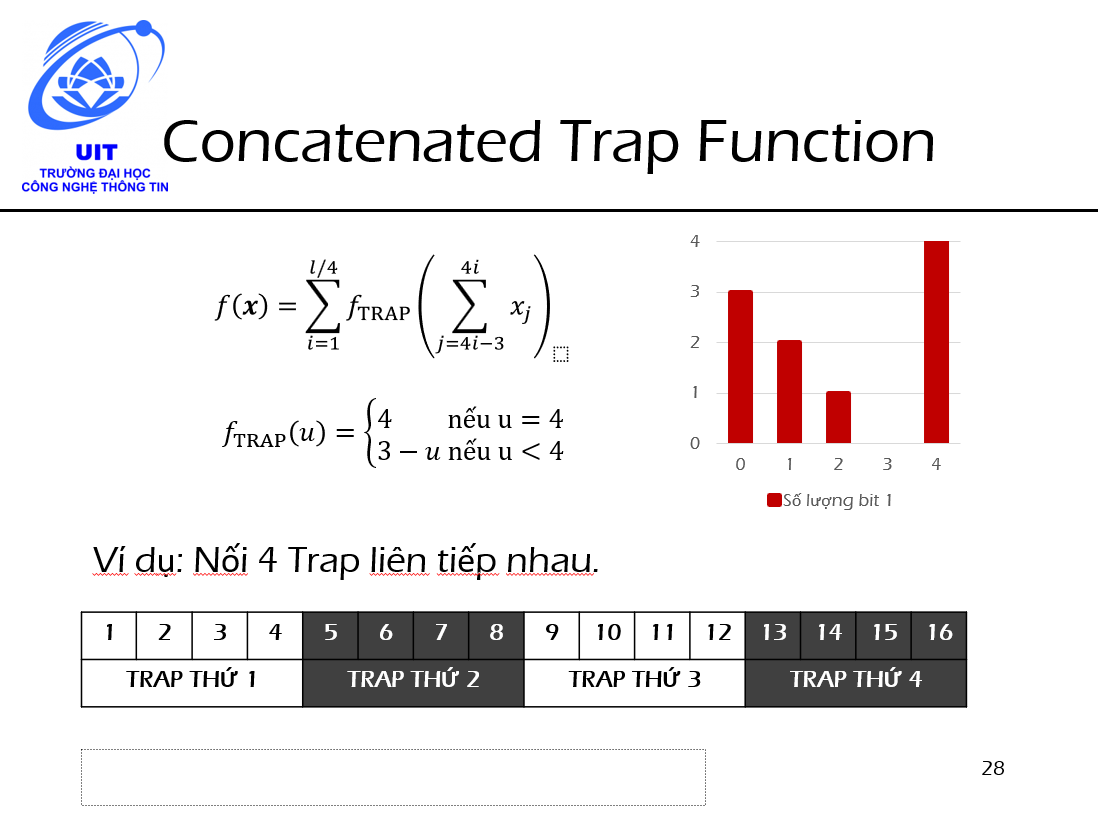

#### Thuật toán

In [8]:
def concatenated_trap_5(ind):
  value = 0
  trap_size = 5

  for i in range(0, len(ind), trap_size):
    trap = np.sum(ind[i : min(i + trap_size, len(ind) ) ] )

    if trap < trap_size: trap = trap_size - 1 - trap

    value += trap
  # end_for

  return value

In [9]:
ind = np.random.randint(2, size=20)
print(ind)
print(concatenated_trap_5(ind) )

[0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0]
9


##  Hàm chọn lọc

### Truncation_selection
Chọn N cá thể có fitness tốt nhất từ (P+O) pool có kích thước 2N.

Takes an array of fitness values (pop_fitness) and returns an array of indices corresponding to the most fit individuals in the population

* Input:
>* pop: quần thể
>* pop_fitness: độ thích nghi của các cá thể trong quần thể
>* selection_size: số lượng cá thể được chọn

* Output:
>* selected_indices: danh sách chỉ số của các cá thể được chọn


In [10]:
def truncation_selection(pop, pop_fitness, selection_size):
    # takes an array of fitness values (pop_fitness) and returns an array of indices corresponding to the most fit individuals in the population
        # np.argsort(pop_fitness): This part sorts the pop_fitness array in ascending order by default.
        # The np.argsort function returns an array of indices that would reorder the original array if you used those indices for indexing.
        # For example, if pop_fitness was [3, 1, 2], then np.argsort(pop_fitness) would return [1, 2, 0].
        # This means the element at index 1 in the original array is the smallest, the element at index 2 is the second smallest, and so on.

        # [-selection_size:]: This slicing operation extracts a sub-array from the sorted indices array.
        # Slicing works by specifying the starting and ending indices separated by a colon.
        # In this case, the negative sign - indicates counting from the end of the array.
        # So, [-selection_size:] refers to all elements from the selection_sizeth element from the end (inclusive) to the very last element.

    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [11]:
# pop = initialize_population(8,4)
pop = np.array([[0, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0]])
pop_fitness = [onemax(x) for x in pop]

print("Pop:", pop)
print("Pop_fitness:", pop_fitness)
print("Selected_indices", truncation_selection(pop, pop_fitness, 4))

Pop: [[0 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]
Pop_fitness: [0, 2, 2, 3, 4, 3, 1, 2]
Selected_indices [7 3 5 4]


### Tournament selection
Chọn lọc giao đấu, không thay thế (without replacement), với tournament size = 4 để chọn N cá thể từ (P+O) pool có kích thước 2N. Đây là cơ chế chọn lọc chuẩn trong POPOP.

* Input:
>* pop: quần thể
>* pop_fitness: độ thích nghi của các cá thể trong quần thể
>* selection_size: số lượng cá thể được chọn
>* tournament_size = 4: kích thước vòng đấu mặc định = 4

* Output:
>* selected_indices: danh sách chỉ số của các cá thể được chọn


In [12]:
def tournament_selection(pop, pop_fitness, selection_size, tournament_size = 4):
  selected_indices = []

  while len(selected_indices) < selection_size:
    # creates an array containing a sequence of numbers starting from 0 and ending at num_individuals-1. Ex: num_individuals = 5 -> [0 1 2 3 4]
    indices = np.arange(len(pop))    # list vị trí chỉ số của các cá thể trong pop

    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)

    # duyệt qua từng vòng đấu
    for i in range(0, len(indices), tournament_size):

      # The min function acts as a safeguard to prevent the slice from extracting elements beyond the valid range of the pop array.
      # It ensures the extracted subset (participants) stays within the array's boundaries.
      participants = indices[i : min([i + tournament_size, len(pop)])]    # lấy chỉ số của các cá thể tham gia vòng đấu trong pop
      participant_fitness = [pop_fitness[i] for i in participants]  # lấy đtn của chúng

      # identifies the winner (individual with the highest fitness) from a set of participants based on their fitness scores
      ranked_participants = np.argsort(participant_fitness)
      winner = participants[ranked_participants[-1]]   # chỉ số của cá thể được chọn trong pop

      selected_indices.append(winner)

      # debug
      # print("participants:", participants)
      # print("ranked_participants:", ranked_participants)
      # print("winner:", ranked_participants[-1], winner)
    # end_for
  # end_while

    # nếu len(selected_indices) > selection_size thì bỏ những cá thể dư
    if len(selected_indices) > selection_size:
      selected_fitness = selected_fitness[: selection_size]

  return selected_indices

In [13]:
# pop = initialize_population(8,4)
pop = np.array([[0, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0]])
pop_fitness = [onemax(x) for x in pop]

print("Pop:", pop)
print("Pop_fitness:", pop_fitness)
print("Selected_indices", tournament_selection(pop, pop_fitness, 4))

Pop: [[0 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]
Pop_fitness: [0, 2, 2, 3, 4, 3, 1, 2]
Selected_indices [3, 4, 4, 5]


### Proportional Selection
Chọn N cá thể từ (P+O) pool có kích thước 2N. Mỗi cá thể có xác suất được chọn lọc dựa trên độ thích nghi của cá thể đó so với tổng độ thích nghi của quần thể.

* Input:
>* pop: quần thể
>* pop_fitness: độ thích nghi của các cá thể trong quần thể
>* selection_size: số lượng cá thể được chọn

* Output:
>* selected_indices: danh sách chỉ số của các cá thể được chọn


In [14]:
def proportional_selection(pop, pop_fitness, selection_size):

  # creates an array containing a sequence of numbers starting from 0 and ending at num_individuals-1. Ex: num_individuals = 5 -> [0 1 2 3 4]
  indices = np.arange(len(pop))    # list vị trí chỉ số của các cá thể trong pop

  # Tổng giá trị thích nghi của pop
  total_fitness = np.sum(pop_fitness)

  # Tạo mảng xác suất được chọn của từng cá thể
  probabilities = [(f / total_fitness) for f in pop_fitness]

  # Chọn ngẫu nhiên n = selection_size cá thể dựa trên mảng xác suất
  selected_indices = np.random.choice(indices, size = selection_size, replace = True, p = probabilities)

  # end_while
  return selected_indices

In [15]:
# pop = initialize_population(8,4)
pop = np.array([[0, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0]])
pop_fitness = [onemax(x) for x in pop]

print("Pop:", pop)
print("Pop_fitness:", pop_fitness)
print("Selected_indices", proportional_selection(pop, pop_fitness, 4))

Pop: [[0 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]
Pop_fitness: [0, 2, 2, 3, 4, 3, 1, 2]
Selected_indices [5 5 3 3]


## Hàm lai ghép đồng nhất (uniform crossover)
Hàm biến đổi tạo ra các cá thể con.

* Arguments:
>* pop -- Quàn thể hiện tại.

* Returns:
>* offspring -- Quần thể chứa các cá thể con được sinh ra.

In [16]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])

    # creates an array containing a sequence of numbers starting from 0 and ending at num_individuals-1. Ex: num_individuals = 5 -> [0 1 2 3 4]
    indices = np.arange(num_individuals)    # list vị trí chỉ số của các cá thể trong pop

    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [17]:
# pop = initialize_population(8,4)
pop = np.array([[0, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0]])
# pop_fitness = [onemax(x) for x in pop]

print("Pop:", pop)
# print("Pop_fitness:", pop_fitness)
print("Offspring:", crossover( pop ) )

Pop: [[0 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]
Offspring: [[0 1 0 1]
 [1 0 1 1]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 1 1 1]]


## Hàm đột biến

In [18]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0

    return pop

## Hàm genetic_algorithm

* Input
>* objective: hàm đánh giá đtn - fitness
>* num_individuals: số cá thể trong quần thể mỗi thế hệ
>* num_parameters: số gen / bit của cá thể
>* max_evaluations: số lần đánh giá đtn - fitness tối đa
>* verbose=False: ==True -> in kết quả trong quá rình chạy

* Output
>* pop: quần thể kết quả
>* pop_fitness: đtn các cá thể trong quần thể kết quả
>* best_fitness: đtn của cá thể tốt nhất qua từng thế hệ


### Minh họa

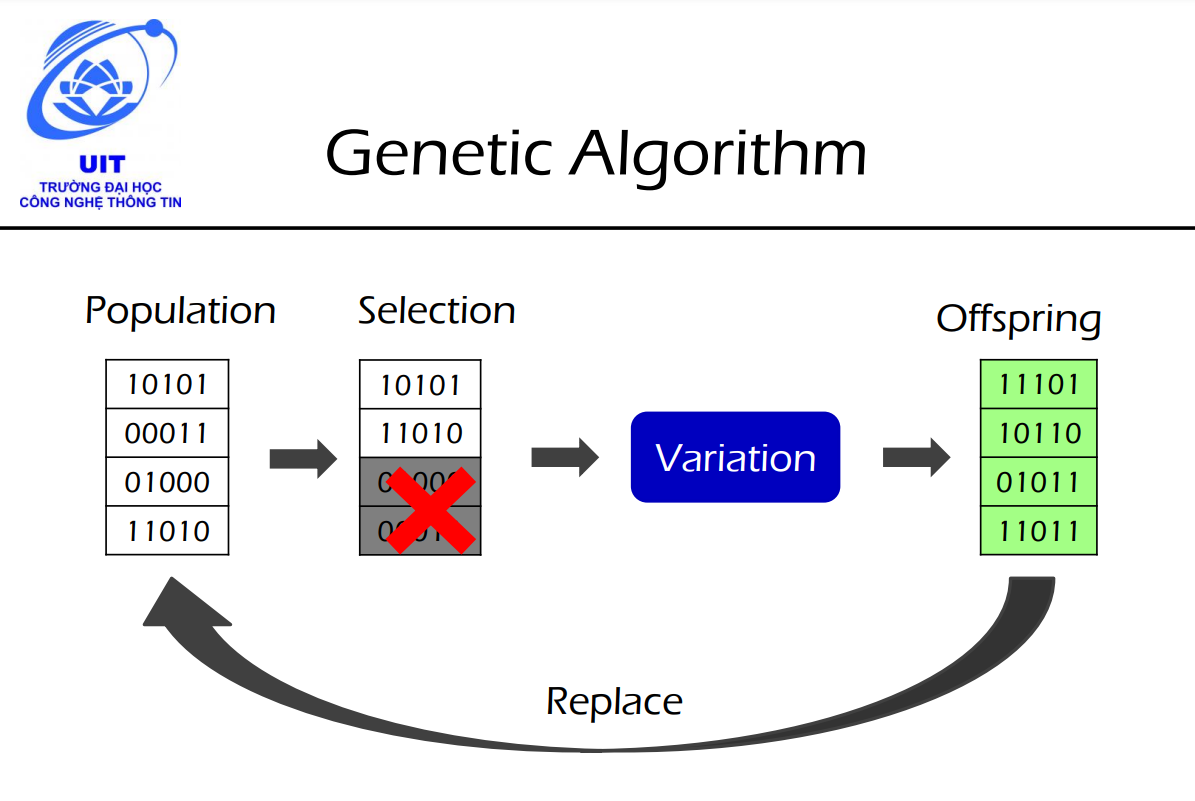

### Thuật toán

In [19]:
def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)    # khởi tạo quần thể
    pop_fitness = np.array([objective(ind) for ind in pop])   # tính độ thích nghi
    num_evaluations = num_individuals   # tính số lần đánh giá đã dùng
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals // 2   # số cá thể được chọn lọc = nửa kích thước quần thể

    # nếu số lần đánh giá đã dùng < số lần đánh giá tối đa thì tiếp tục
    # nếu không thì kết thúc
    while num_evaluations < max_evaluations:

        # chọn lọc ra các cá thể để lai ghép
        best_fitness.append([num_evaluations, np.max(pop_fitness)])   # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
        selected_indices = truncation_selection( pop, pop_fitness, selection_size )   # chọn lọc -> danh sách chỉ số của các cá thể được chọn
        selection_set = pop[selected_indices]   # lấy ra các cá thể được chọn
        selection_fitness = pop_fitness[selected_indices]   # lấy đtn của các cá thể được chọn

        # lai ghép tạo ra thế hệ con
        offspring = crossover(selection_set)    # lai ghép -> list các cá thể con
        # offspring = mutation(offspring, 0.1)    # đột biến
        offspring_fitness = np.array([objective(ind) for ind in offspring])   # tính đtn của các cá thể con
        num_evaluations += len(offspring)   # cộng thêm số lần đánh giá đã dùng

        # combines two arrays, selection_set and offspring, into a single new array called pop
        # kết hợp selection_set và offspring thành pop - quần thể mới
        # stacking the two arrays selection_set and offspring on top of each other, one row after another, to form a new array pop
        pop = np.vstack([selection_set, offspring])

        # kết hợp selection_fitness và offspring_fitness thành pop_fitness - đtn của quần thể mới
        # np.concatenate function takes a tuple of arrays (enclosed in parentheses ()) that you want to join together and concatenates them along a specified axis
        # By default, np.concatenate concatenates arrays along the first axis (typically rows).
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

        if verbose:
            print(f'#Gen {i+1}:')
            print(pop_fitness)
    # end_while

    best_fitness.append([num_evaluations, np.max(pop_fitness)])   # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)


## Hàm genetic_algorithm_popop

* Input
>* objective: hàm đánh giá đtn - fitness
>* num_individuals: số cá thể trong quần thể mỗi thế hệ
>* num_parameters: số gen / bit của cá thể
>* max_evaluations: số lần đánh giá đtn - fitness tối đa
>* select_strategy in ["truncation", "tournament", "proportional"]: chiến lược chọn lọc
>* verbose=False: ==True -> in kết quả trong quá rình chạy

* Output
>* pop: quần thể kết quả
>* pop_fitness: đtn các cá thể trong quần thể kết quả
>* best_fitness: đtn của cá thể tốt nhất qua từng thế hệ


### Minh họa

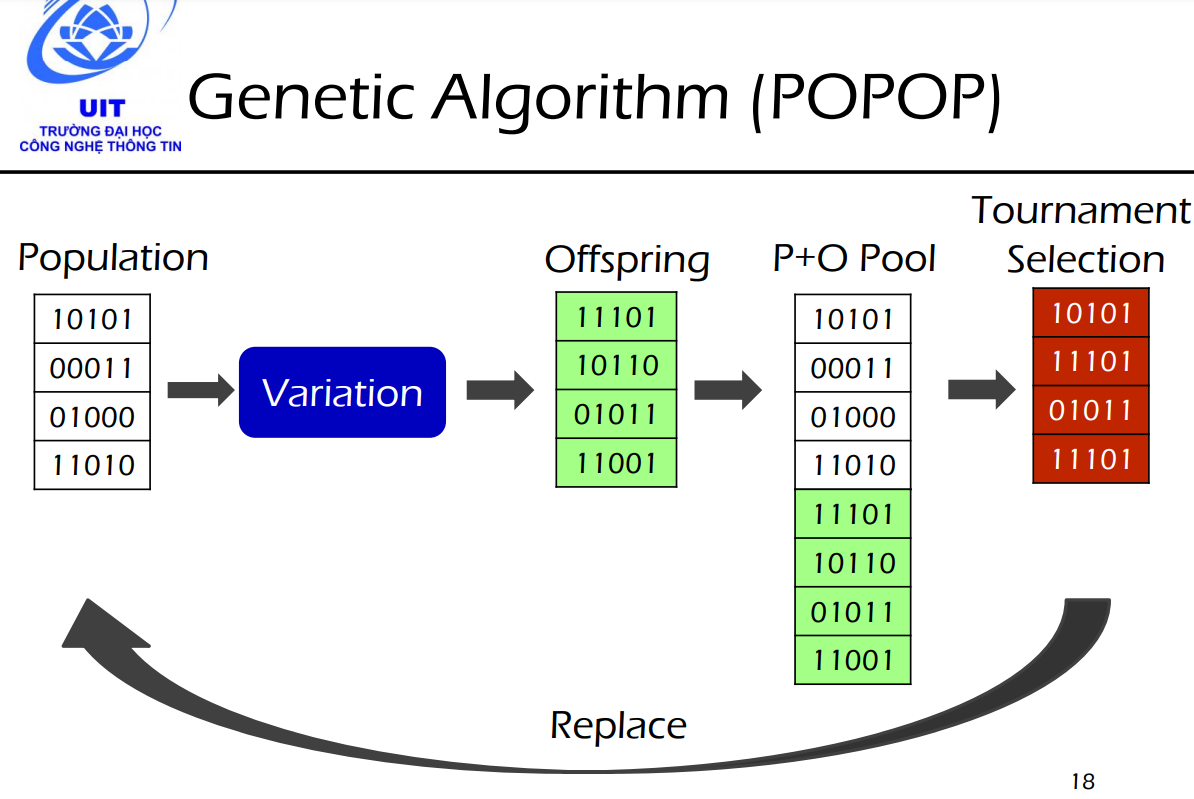

### Thuật toán

In [20]:
def genetic_algorithm_popop(objective, num_individuals, num_parameters, max_evaluations, select_strategy = "truncation", verbose = False):

    pop = initialize_population(num_individuals, num_parameters)    # khởi tạo quần thể
    pop_fitness = np.array([objective(ind) for ind in pop])   # tính độ thích nghi
    num_evaluations = num_individuals   # tính số lần đánh giá đã dùng
    best_fitness = []

    if select_strategy not in ["truncation", "tournament", "proportional"]:
      if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)
      # end_if

      # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
      best_fitness.append([num_evaluations, np.max(pop_fitness)])

      return (pop, pop_fitness, best_fitness)
    # end_if

    if verbose:
        print("#Gen 0:")
        print(pop_fitness)
    # end_if

    selection_size = num_individuals // 2   # số cá thể được chọn lọc = nửa kích thước quần thể
    gen = 1   # thế hệ

    # nếu số lần đánh giá đã dùng < số lần đánh giá tối đa thì tiếp tục
    # nếu không thì kết thúc
    while num_evaluations < max_evaluations:
        # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
        best_fitness.append([num_evaluations, np.max(pop_fitness)])

        # lai ghép tạo ra thế hệ con
        offspring = crossover(pop)    # lai ghép -> list các cá thể con
        offspring_fitness = np.array([objective(ind) for ind in offspring])   # tính đtn của các cá thể con
        num_evaluations += len(offspring)   # cộng thêm số lần đánh giá đã dùng

        # combines two arrays, pop and offspring, into a single new array called pop_offspring
        # kết hợp selection_set và offspring thành pop - quần thể mới
        # stacking the two arrays selection_set and offspring on top of each other, one row after another, to form a new array pop
        pop_offspring = np.vstack([pop, offspring])

        # kết hợp pop_fitness và offspring_fitness thành pop_offspring_fitness
        # np.concatenate function takes a tuple of arrays (enclosed in parentheses ()) that you want to join together and concatenates them along a specified axis
        # By default, np.concatenate concatenates arrays along the first axis (typically rows).
        pop_offspring_fitness = np.concatenate((pop_fitness, offspring_fitness))

        # chọn lọc ra các cá thể
        # chọn lọc -> danh sách chỉ số của các cá thể được chọn
        if select_strategy == "truncation":
          selected_indices = truncation_selection( pop_offspring, pop_offspring_fitness, selection_size )
        elif select_strategy == "tournament":
          selected_indices = tournament_selection( pop_offspring, pop_offspring_fitness, selection_size )
        elif select_strategy == "proportional":
          selected_indices = proportional_selection( pop_offspring, pop_offspring_fitness, selection_size )

        selection_set = [pop_offspring[i] for i in selected_indices]   # lấy ra các cá thể được chọn
        selection_fitness = [pop_offspring_fitness[i] for i in selected_indices]   # lấy đtn của các cá thể được chọn

        # replace
        pop = selection_set
        pop_fitness = selection_fitness

        if verbose:
            print(f'#Gen {gen}:')
            print(pop_fitness)
            gen += 1
        # end_if
    # end_while

    # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
    best_fitness.append([num_evaluations, np.max(pop_fitness)])

    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)
    # end_if

    return (pop, pop_fitness, best_fitness)


## Chạy thuật toán

select_strategiess = ["truncation", "tournament", "proportional"]

### Chạy thử

#### Onemax với 100 bit

In [ ]:
np.random.seed(42)
num_parameters = 100
num_individuals = 128
max_evaluations = 100000  # 100.000

# pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
pop, pop_fitness, best_fitness = genetic_algorithm_popop(onemax, num_individuals, num_parameters, max_evaluations, select_strategy = "truncation", verbose = False)

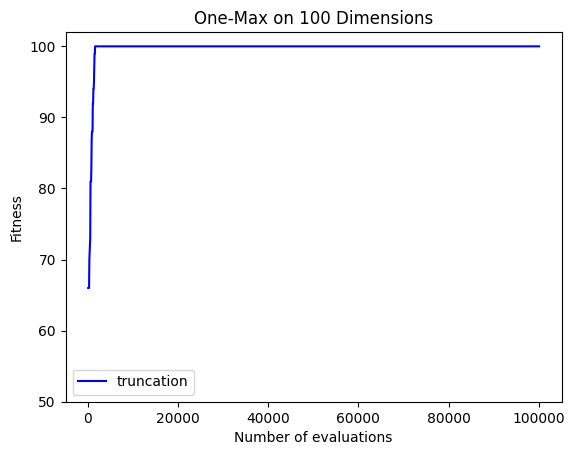

In [ ]:
best_fitness = np.array(best_fitness)
plt.plot(best_fitness[:,0], best_fitness[:,1], label='truncation', color='b')

plt.xlabel("Number of evaluations")
plt.ylabel("Fitness")
plt.ylim(num_parameters/2, num_parameters+2)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

#### LeadingOne với 10 bit

In [ ]:
np.random.seed(42)
num_parameters = 10
num_individuals = 128
max_evaluations = 100000  # 100.000

# pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
pop, pop_fitness, best_fitness = genetic_algorithm_popop(leading_one, num_individuals, num_parameters, max_evaluations, select_strategy = "tournament", verbose = False)

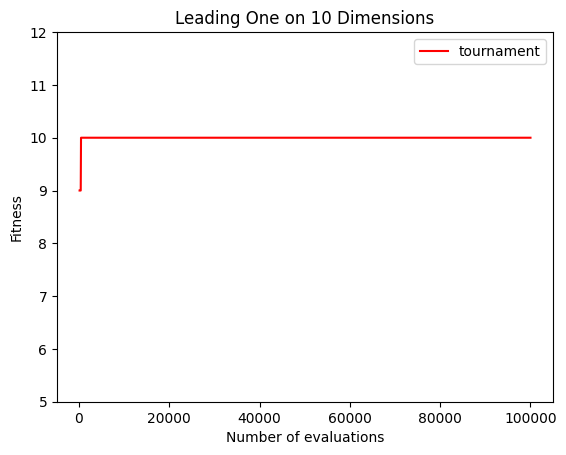

In [ ]:
best_fitness = np.array(best_fitness)
plt.plot(best_fitness[:,0], best_fitness[:,1], label='tournament', color='r')

plt.xlabel("Number of evaluations")
plt.ylabel("Fitness")
plt.ylim(num_parameters/2, num_parameters + 2 )
plt.title(f"Leading One on {num_parameters} Dimensions")
plt.legend();

#### Concatenated Trap-5 với 20 bit

In [ ]:
np.random.seed(42)
num_parameters = 20
num_individuals = 128
max_evaluations = 100000  # 100.000

# pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
pop, pop_fitness, best_fitness = genetic_algorithm_popop(concatenated_trap_5, num_individuals, num_parameters, max_evaluations, select_strategy = "proportional", verbose = False)

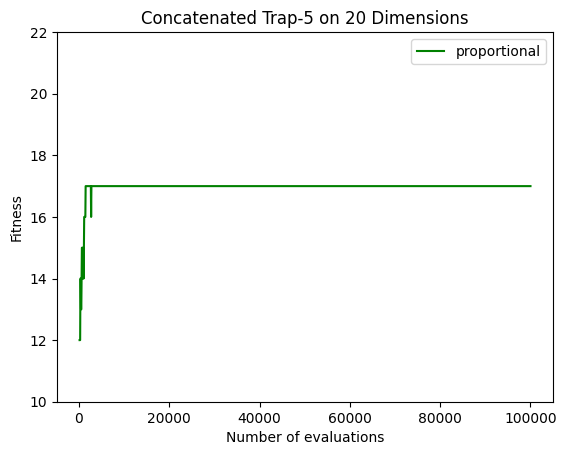

In [ ]:
best_fitness = np.array(best_fitness)
plt.plot(best_fitness[:,0], best_fitness[:,1], label='proportional', color='g')

plt.xlabel("Number of evaluations")
plt.ylabel("Fitness")
plt.ylim(num_parameters/2, num_parameters + 2 )
plt.title(f"Concatenated Trap-5 on {num_parameters} Dimensions")
plt.legend();

### Chạy thực nghiệm

#### Onemax với 100 bit

In [ ]:
n_trials = 10
num_parameters = 100
max_evaluations = 100000
num_individuals = 128 # population size
seed = 215214650

fits_onemax_truncation = []    # best_fitness over time of truncation
fits_onemax_tournament = []    # best_fitness over time of tournament
fits_onemax_proportional = []    # best_fitness over time of proportional

evals_onemax_truncation = []    # best_fitness của quần thể đầu tiên
evals_onemax_tournament = []    # best_fitness của quần thể đầu tiên
evals_onemax_proportional = []    # best_fitness của quần thể đầu tiên

for i in range(n_trials):
    np.random.seed(seed + i)

    # truncation
    pop_onemax_truncation, pop_fitness_onemax_truncation, best_fitness_onemax_truncation = genetic_algorithm_popop(onemax, num_individuals, num_parameters, max_evaluations, select_strategy = "truncation", verbose = False)
    best_fitness_onemax_truncation = np.array(best_fitness_onemax_truncation)
    if i == 0:
        evals_onemax_truncation = best_fitness_onemax_truncation[:,0]
    fits_onemax_truncation.append(best_fitness_onemax_truncation[:,1])

    # tournament
    pop_onemax_tournament, pop_onemax_fitness_tournament, best_fitness_onemax_tournament = genetic_algorithm_popop(onemax, num_individuals, num_parameters, max_evaluations, select_strategy = "tournament", verbose = False)
    best_fitness_onemax_tournament = np.array(best_fitness_onemax_tournament)
    if i == 0:
        evals_onemax_tournament = best_fitness_onemax_tournament[:,0]
    fits_onemax_tournament.append(best_fitness_onemax_tournament[:,1])

    # proportional
    pop_onemax_proportional, pop_fitness_onemax_proportional, best_fitness_onemax_proportional = genetic_algorithm_popop(onemax, num_individuals, num_parameters, max_evaluations, select_strategy = "proportional", verbose = False)
    best_fitness_onemax_proportional = np.array(best_fitness_onemax_proportional)
    if i == 0:
        evals_onemax_proportional = best_fitness_onemax_proportional[:,0]
    fits_onemax_proportional.append(best_fitness_onemax_proportional[:,1])

##### Thống kê kết quả

###### Truncation

In [ ]:
fits_onemax_truncation = np.array(fits_onemax_truncation)
fits_onemax_truncation

array([[ 64,  64,  69, ..., 100, 100, 100],
       [ 64,  64,  67, ..., 100, 100, 100],
       [ 59,  60,  64, ..., 100, 100, 100],
       ...,
       [ 64,  67,  67, ..., 100, 100, 100],
       [ 64,  64,  65, ..., 100, 100, 100],
       [ 62,  64,  65, ..., 100, 100, 100]])

In [ ]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_onemax_truncation = np.mean(fits_onemax_truncation, axis=0)
err_onemax_truncation = np.std(fits_onemax_truncation, axis=0)
avg_onemax_truncation

array([ 63.6,  64.4,  66. , ..., 100. , 100. , 100. ])

###### Tournament

In [ ]:
fits_onemax_tournament = np.array(fits_onemax_tournament)
fits_onemax_tournament

array([[ 60,  64,  65, ...,  99,  99,  99],
       [ 62,  62,  65, ..., 100, 100, 100],
       [ 62,  62,  63, ..., 100, 100, 100],
       ...,
       [ 61,  65,  65, ...,  99,  99,  99],
       [ 61,  63,  66, ..., 100, 100, 100],
       [ 62,  68,  68, ..., 100, 100, 100]])

In [ ]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_onemax_tournament = np.mean(fits_onemax_tournament, axis=0)
err_onemax_tournament = np.std(fits_onemax_tournament, axis=0)
avg_onemax_tournament

array([61.8, 63.6, 64.9, ..., 99.5, 99.5, 99.5])

###### Proportional

In [ ]:
fits_onemax_proportional = np.array(fits_onemax_proportional)
fits_onemax_proportional

array([[62, 61, 66, ..., 73, 73, 73],
       [63, 65, 65, ..., 70, 70, 70],
       [59, 61, 57, ..., 78, 78, 78],
       ...,
       [63, 61, 61, ..., 76, 76, 76],
       [60, 60, 59, ..., 78, 78, 78],
       [66, 61, 63, ..., 76, 76, 76]])

In [ ]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_onemax_proportional = np.mean(fits_onemax_proportional, axis=0)
err_onemax_proportional = np.std(fits_onemax_proportional, axis=0)
avg_onemax_proportional

array([62.5, 61.7, 61.2, ..., 74.4, 74.4, 74.4])

###### Visualize

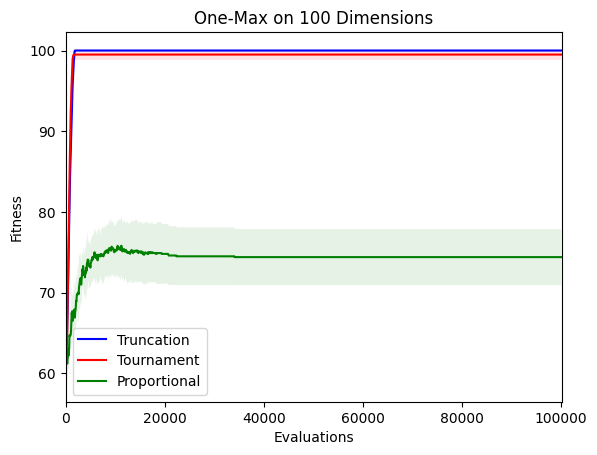

In [ ]:
plt.plot(evals_onemax_truncation, avg_onemax_truncation, label="Truncation", color='b')
plt.fill_between(evals_onemax_truncation, avg_onemax_truncation + err_onemax_truncation, avg_onemax_truncation - err_onemax_truncation, facecolor='b', alpha=0.1)

plt.plot(evals_onemax_tournament, avg_onemax_tournament, label="Tournament", color='r')
plt.fill_between(evals_onemax_tournament, avg_onemax_tournament + err_onemax_tournament, avg_onemax_tournament - err_onemax_tournament, facecolor='r', alpha=0.1)

plt.plot(evals_onemax_proportional, avg_onemax_proportional, label="Proportional", color='g')
plt.fill_between(evals_onemax_proportional, avg_onemax_proportional + err_onemax_proportional, avg_onemax_proportional - err_onemax_proportional, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on 100 Dimensions")
plt.legend();

#### LeadingOne với 10 bit

In [ ]:
n_trials = 10
num_parameters = 10
max_evaluations = 100000
num_individuals = 128 # population size
seed = 215214650

fits_leading_one_truncation = []    # best_fitness over time of truncation
fits_leading_one_tournament = []    # best_fitness over time of tournament
fits_leading_one_proportional = []    # best_fitness over time of proportional

evals_leading_one_truncation = []    # best_fitness của quần thể đầu tiên
evals_leading_one_tournament = []    # best_fitness của quần thể đầu tiên
evals_leading_one_proportional = []    # best_fitness của quần thể đầu tiên

for i in range(n_trials):
    np.random.seed(seed + i)

    # truncation
    pop_leading_one_truncation, pop_fitness_leading_one_truncation, best_fitness_leading_one_truncation = genetic_algorithm_popop(leading_one, num_individuals, num_parameters, max_evaluations, select_strategy = "truncation", verbose = False)
    best_fitness_leading_one_truncation = np.array(best_fitness_leading_one_truncation)
    if i == 0:
        evals_leading_one_truncation = best_fitness_leading_one_truncation[:,0]
    fits_leading_one_truncation.append(best_fitness_leading_one_truncation[:,1])

    # tournament
    pop_leading_one_tournament, pop_leading_one_fitness_tournament, best_fitness_leading_one_tournament = genetic_algorithm_popop(leading_one, num_individuals, num_parameters, max_evaluations, select_strategy = "tournament", verbose = False)
    best_fitness_leading_one_tournament = np.array(best_fitness_leading_one_tournament)
    if i == 0:
        evals_leading_one_tournament = best_fitness_leading_one_tournament[:,0]
    fits_leading_one_tournament.append(best_fitness_leading_one_tournament[:,1])

    # proportional
    pop_leading_one_proportional, pop_fitness_leading_one_proportional, best_fitness_leading_one_proportional = genetic_algorithm_popop(leading_one, num_individuals, num_parameters, max_evaluations, select_strategy = "proportional", verbose = False)
    best_fitness_leading_one_proportional = np.array(best_fitness_leading_one_proportional)
    if i == 0:
        evals_leading_one_proportional = best_fitness_leading_one_proportional[:,0]
    fits_leading_one_proportional.append(best_fitness_leading_one_proportional[:,1])

##### Thống kê kết quả

###### Truncation

In [ ]:
fits_leading_one_truncation = np.array(fits_leading_one_truncation)
fits_leading_one_truncation

array([[ 4,  6, 10, ..., 10, 10, 10],
       [ 6,  6, 10, ..., 10, 10, 10],
       [ 8, 10, 10, ..., 10, 10, 10],
       ...,
       [ 5,  7,  7, ..., 10, 10, 10],
       [ 8,  8, 10, ..., 10, 10, 10],
       [ 9,  9,  9, ..., 10, 10, 10]])

In [ ]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_leading_one_truncation = np.mean(fits_leading_one_truncation, axis=0)
err_leading_one_truncation = np.std(fits_leading_one_truncation, axis=0)
avg_leading_one_truncation

array([ 7.3,  7.9,  9.3, ..., 10. , 10. , 10. ])

###### Tournament

In [ ]:
fits_leading_one_tournament = np.array(fits_leading_one_tournament)
fits_leading_one_tournament

array([[ 6,  6,  9, ..., 10, 10, 10],
       [ 9,  9,  9, ..., 10, 10, 10],
       [ 6,  7,  7, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [ 6,  6,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ..., 10, 10, 10]])

In [ ]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_leading_one_tournament = np.mean(fits_leading_one_tournament, axis=0)
err_leading_one_tournament = np.std(fits_leading_one_tournament, axis=0)
avg_leading_one_tournament

array([7.5, 7.8, 8.4, ..., 9.5, 9.5, 9.5])

###### Proportional

In [ ]:
fits_leading_one_proportional = np.array(fits_leading_one_proportional)
fits_leading_one_proportional

array([[ 9,  9,  9, ..., 10, 10, 10],
       [ 5,  8,  8, ..., 10, 10, 10],
       [ 8,  8,  8, ..., 10, 10, 10],
       ...,
       [ 7,  7,  7, ..., 10, 10, 10],
       [ 7, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]])

In [ ]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_leading_one_proportional = np.mean(fits_leading_one_proportional, axis=0)
err_leading_one_proportional = np.std(fits_leading_one_proportional, axis=0)
avg_leading_one_proportional

array([ 6.8,  7.9,  8.1, ..., 10. , 10. , 10. ])

###### Visualize

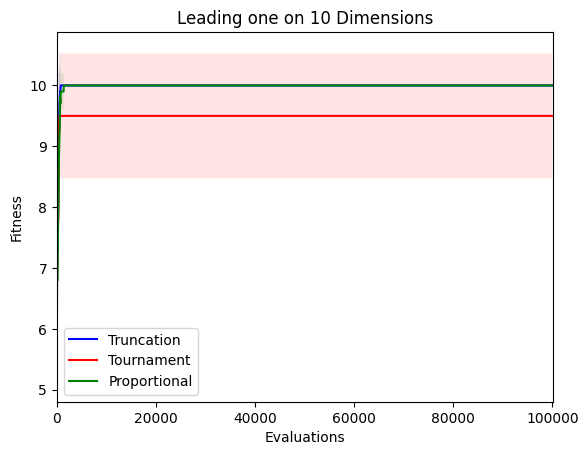

In [ ]:
plt.plot(evals_leading_one_truncation, avg_leading_one_truncation, label="Truncation", color='b')
plt.fill_between(evals_leading_one_truncation, avg_leading_one_truncation + err_leading_one_truncation, avg_leading_one_truncation - err_leading_one_truncation, facecolor='b', alpha=0.1)

plt.plot(evals_leading_one_tournament, avg_leading_one_tournament, label="Tournament", color='r')
plt.fill_between(evals_leading_one_tournament, avg_leading_one_tournament + err_leading_one_tournament, avg_leading_one_tournament - err_leading_one_tournament, facecolor='r', alpha=0.1)

plt.plot(evals_leading_one_proportional, avg_leading_one_proportional, label="Proportional", color='g')
plt.fill_between(evals_leading_one_proportional, avg_leading_one_proportional + err_leading_one_proportional, avg_leading_one_proportional - err_leading_one_proportional, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"Leading one on 10 Dimensions")
plt.legend();

#### Concatenated Trap-5 với 20 bit

In [21]:
n_trials = 10
num_parameters = 20
max_evaluations = 100000
num_individuals = 128 # population size
seed = 215214650

fits_concatenated_trap_5_truncation = []    # best_fitness over time of truncation
fits_concatenated_trap_5_tournament = []    # best_fitness over time of tournament
fits_concatenated_trap_5_proportional = []    # best_fitness over time of proportional

evals_concatenated_trap_5_truncation = []    # best_fitness của quần thể đầu tiên
evals_concatenated_trap_5_tournament = []    # best_fitness của quần thể đầu tiên
evals_concatenated_trap_5_proportional = []    # best_fitness của quần thể đầu tiên

for i in range(n_trials):
    np.random.seed(seed + i)

    # truncation
    pop_concatenated_trap_5_truncation, pop_fitness_concatenated_trap_5_truncation, best_fitness_concatenated_trap_5_truncation = genetic_algorithm_popop(concatenated_trap_5, num_individuals, num_parameters, max_evaluations, select_strategy = "truncation", verbose = False)
    best_fitness_concatenated_trap_5_truncation = np.array(best_fitness_concatenated_trap_5_truncation)
    if i == 0:
        evals_concatenated_trap_5_truncation = best_fitness_concatenated_trap_5_truncation[:,0]
    fits_concatenated_trap_5_truncation.append(best_fitness_concatenated_trap_5_truncation[:,1])

    # tournament
    pop_concatenated_trap_5_tournament, pop_concatenated_trap_5_fitness_tournament, best_fitness_concatenated_trap_5_tournament = genetic_algorithm_popop(concatenated_trap_5, num_individuals, num_parameters, max_evaluations, select_strategy = "tournament", verbose = False)
    best_fitness_concatenated_trap_5_tournament = np.array(best_fitness_concatenated_trap_5_tournament)
    if i == 0:
        evals_concatenated_trap_5_tournament = best_fitness_concatenated_trap_5_tournament[:,0]
    fits_concatenated_trap_5_tournament.append(best_fitness_concatenated_trap_5_tournament[:,1])

    # proportional
    pop_concatenated_trap_5_proportional, pop_fitness_concatenated_trap_5_proportional, best_fitness_concatenated_trap_5_proportional = genetic_algorithm_popop(concatenated_trap_5, num_individuals, num_parameters, max_evaluations, select_strategy = "proportional", verbose = False)
    best_fitness_concatenated_trap_5_proportional = np.array(best_fitness_concatenated_trap_5_proportional)
    if i == 0:
        evals_concatenated_trap_5_proportional = best_fitness_concatenated_trap_5_proportional[:,0]
    fits_concatenated_trap_5_proportional.append(best_fitness_concatenated_trap_5_proportional[:,1])

##### Thống kê kết quả

###### Truncation

In [22]:
fits_concatenated_trap_5_truncation = np.array(fits_concatenated_trap_5_truncation)
fits_concatenated_trap_5_truncation

array([[13, 13, 14, ..., 18, 18, 18],
       [12, 16, 16, ..., 18, 18, 18],
       [14, 14, 14, ..., 18, 18, 18],
       ...,
       [13, 14, 14, ..., 18, 18, 18],
       [14, 14, 15, ..., 17, 17, 17],
       [13, 13, 13, ..., 17, 17, 17]])

In [23]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_concatenated_trap_5_truncation = np.mean(fits_concatenated_trap_5_truncation, axis=0)
err_concatenated_trap_5_truncation = np.std(fits_concatenated_trap_5_truncation, axis=0)
avg_concatenated_trap_5_truncation

array([13.5, 14.3, 14.5, ..., 17.7, 17.7, 17.7])

###### Tournament

In [24]:
fits_concatenated_trap_5_tournament = np.array(fits_concatenated_trap_5_tournament)
fits_concatenated_trap_5_tournament

array([[13, 13, 17, ..., 18, 18, 18],
       [13, 13, 13, ..., 16, 16, 16],
       [15, 15, 16, ..., 17, 17, 17],
       ...,
       [13, 13, 13, ..., 17, 17, 17],
       [13, 13, 13, ..., 17, 17, 17],
       [12, 15, 17, ..., 18, 18, 18]])

In [25]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_concatenated_trap_5_tournament = np.mean(fits_concatenated_trap_5_tournament, axis=0)
err_concatenated_trap_5_tournament = np.std(fits_concatenated_trap_5_tournament, axis=0)
avg_concatenated_trap_5_tournament

array([13.3, 14.1, 14.8, ..., 17.6, 17.6, 17.6])

###### Proportional

In [26]:
fits_concatenated_trap_5_proportional = np.array(fits_concatenated_trap_5_proportional)
fits_concatenated_trap_5_proportional

array([[14, 14, 11, ..., 16, 16, 16],
       [14, 14, 14, ..., 16, 16, 16],
       [16, 14, 14, ..., 16, 16, 16],
       ...,
       [14, 14, 14, ..., 14, 14, 14],
       [13, 13, 15, ..., 16, 16, 16],
       [13, 13, 15, ..., 18, 18, 18]])

In [27]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg_concatenated_trap_5_proportional = np.mean(fits_concatenated_trap_5_proportional, axis=0)
err_concatenated_trap_5_proportional = np.std(fits_concatenated_trap_5_proportional, axis=0)
avg_concatenated_trap_5_proportional

array([13.6, 13. , 13.3, ..., 16.1, 16.1, 16.1])

###### Visualize

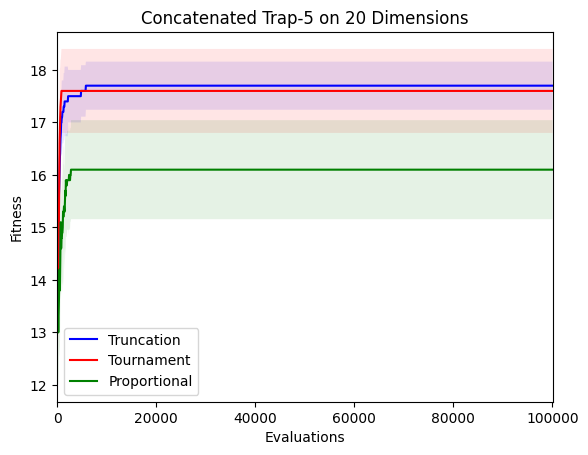

In [28]:
plt.plot(evals_concatenated_trap_5_truncation, avg_concatenated_trap_5_truncation, label="Truncation", color='b')
plt.fill_between(evals_concatenated_trap_5_truncation, avg_concatenated_trap_5_truncation + err_concatenated_trap_5_truncation, avg_concatenated_trap_5_truncation - err_concatenated_trap_5_truncation, facecolor='b', alpha=0.1)

plt.plot(evals_concatenated_trap_5_tournament, avg_concatenated_trap_5_tournament, label="Tournament", color='r')
plt.fill_between(evals_concatenated_trap_5_tournament, avg_concatenated_trap_5_tournament + err_concatenated_trap_5_tournament, avg_concatenated_trap_5_tournament - err_concatenated_trap_5_tournament, facecolor='r', alpha=0.1)

plt.plot(evals_concatenated_trap_5_proportional, avg_concatenated_trap_5_proportional, label="Proportional", color='g')
plt.fill_between(evals_concatenated_trap_5_proportional, avg_concatenated_trap_5_proportional + err_concatenated_trap_5_proportional, avg_concatenated_trap_5_proportional - err_concatenated_trap_5_proportional, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"Concatenated Trap-5 on 20 Dimensions")
plt.legend();

## Đánh giá

### One-Max on 100 Dimensions

* Truncation selection có kết quả tốt nhất nhưng không có chênh lệch quá lớn so với tournament selection. Cả 2 phép chọn lọc này đều hội tụ rất sớm và sai số nhỏ.
* Proportional selection có kết quả kém hơn nhiều, hội tụ chậm hơn, có sai số lớn hơn và không hội tụ về kết quả tốt nhất.

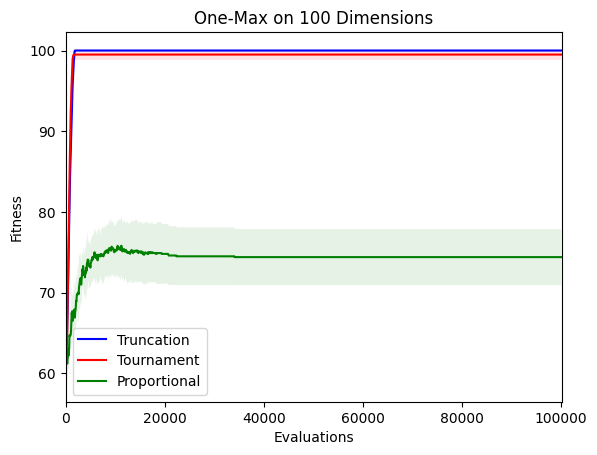

In [ ]:
plt.plot(evals_onemax_truncation, avg_onemax_truncation, label="Truncation", color='b')
plt.fill_between(evals_onemax_truncation, avg_onemax_truncation + err_onemax_truncation, avg_onemax_truncation - err_onemax_truncation, facecolor='b', alpha=0.1)

plt.plot(evals_onemax_tournament, avg_onemax_tournament, label="Tournament", color='r')
plt.fill_between(evals_onemax_tournament, avg_onemax_tournament + err_onemax_tournament, avg_onemax_tournament - err_onemax_tournament, facecolor='r', alpha=0.1)

plt.plot(evals_onemax_proportional, avg_onemax_proportional, label="Proportional", color='g')
plt.fill_between(evals_onemax_proportional, avg_onemax_proportional + err_onemax_proportional, avg_onemax_proportional - err_onemax_proportional, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on 100 Dimensions")
plt.legend();

### Leading one on 10 Dimensions

* Truncation selection có kết quả tốt, hội tụ nhanh và sai số nhỏ.
* Proportional selection có kết quả tốt và sai số nhỏ như truncation selection nhưng hội tụ chậm hơn.
* Tournament selection hội tụ nhanh nhưng có kết quả kém hơn, sai số lớn hơn 2 phép trên.

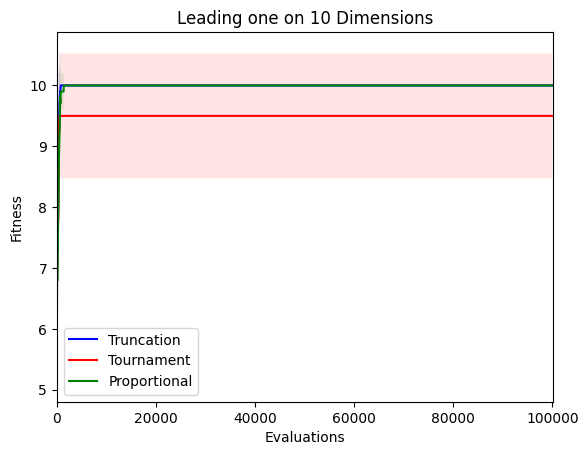

In [ ]:
plt.plot(evals_leading_one_truncation, avg_leading_one_truncation, label="Truncation", color='b')
plt.fill_between(evals_leading_one_truncation, avg_leading_one_truncation + err_leading_one_truncation, avg_leading_one_truncation - err_leading_one_truncation, facecolor='b', alpha=0.1)

plt.plot(evals_leading_one_tournament, avg_leading_one_tournament, label="Tournament", color='r')
plt.fill_between(evals_leading_one_tournament, avg_leading_one_tournament + err_leading_one_tournament, avg_leading_one_tournament - err_leading_one_tournament, facecolor='r', alpha=0.1)

plt.plot(evals_leading_one_proportional, avg_leading_one_proportional, label="Proportional", color='g')
plt.fill_between(evals_leading_one_proportional, avg_leading_one_proportional + err_leading_one_proportional, avg_leading_one_proportional - err_leading_one_proportional, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"Leading one on 10 Dimensions")
plt.legend();

### Concatenated Trap-5 on 20 Dimensions

* Truncation selection hội tụ nhanh nhất.
* Tournament selection hội tụ chậm nhất nhưng có kết quả tốt nhất và sai số nhỏ nhất.
* Proportional selection hộn tụ nhanh hơn tournament selection, chậm hơn truncation selection nhưng cho kết quả kém hơn 2 phép trên.

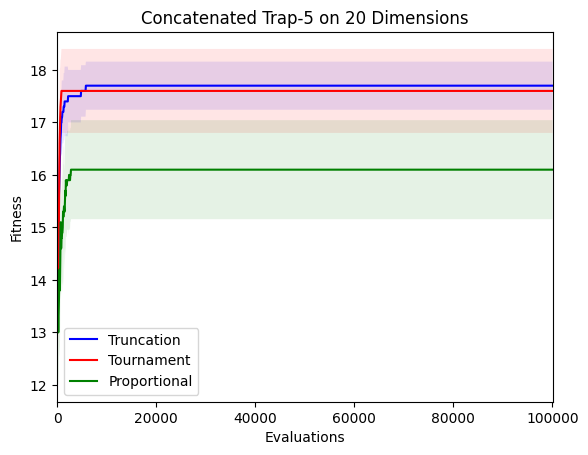

In [29]:
plt.plot(evals_concatenated_trap_5_truncation, avg_concatenated_trap_5_truncation, label="Truncation", color='b')
plt.fill_between(evals_concatenated_trap_5_truncation, avg_concatenated_trap_5_truncation + err_concatenated_trap_5_truncation, avg_concatenated_trap_5_truncation - err_concatenated_trap_5_truncation, facecolor='b', alpha=0.1)

plt.plot(evals_concatenated_trap_5_tournament, avg_concatenated_trap_5_tournament, label="Tournament", color='r')
plt.fill_between(evals_concatenated_trap_5_tournament, avg_concatenated_trap_5_tournament + err_concatenated_trap_5_tournament, avg_concatenated_trap_5_tournament - err_concatenated_trap_5_tournament, facecolor='r', alpha=0.1)

plt.plot(evals_concatenated_trap_5_proportional, avg_concatenated_trap_5_proportional, label="Proportional", color='g')
plt.fill_between(evals_concatenated_trap_5_proportional, avg_concatenated_trap_5_proportional + err_concatenated_trap_5_proportional, avg_concatenated_trap_5_proportional - err_concatenated_trap_5_proportional, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"Concatenated Trap-5 on 20 Dimensions")
plt.legend();